In [1]:
!nvidia-smi

Mon Mar 24 17:41:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.61                 Driver Version: 551.61         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:01:00.0  On |                  N/A |
| 40%   37C    P8             11W /  170W |     646MiB /  12288MiB |      4%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
import glob
from IPython.display import Image as IPyImage, display

In [28]:

from ultralytics import YOLO
import torch
import ultralytics 
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

In [4]:
HOME = os.getcwd()
print(HOME)

d:\capstone\YOLO11_EfficientNet


In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nQTXLrRaY1Hc0PxXWeDa")
project = rf.workspace("datasets-xynxm").project("crops-weeds")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to crops,weeds-2 in yolov11:: 100%|██████████| 9808/9808 [00:06<00:00, 1482.56it/s]


In [5]:
# Load Model
model = YOLO(r"D:\capstone\YOLO11_EfficientNet\ultralytics\cfg\models\11\yolo11_EfficientNet.yaml")

WARNING  no model scale passed. Assuming scale='n'.


In [6]:
import os
file_path = "D:\capstone\YOLO11_EfficientNet\crops,weeds-2\data.yaml"
if os.path.exists(file_path):
    print("✅ File found!")
else:
    print("❌ File NOT found! Check the path.")


✅ File found!


In [7]:
import os

paths = [
    "D:/capstone/YOLO11_EfficientNet/crops,weeds-2/data.yaml",
    "D:/capstone/YOLO11_EfficientNet/crops,weeds-2/train/images",
    "D:/capstone/YOLO11_EfficientNet/crops,weeds-2/valid/images",
    "D:/capstone/YOLO11_EfficientNet/crops,weeds-2/test/images"
]

for path in paths:
    print(f"{path}: {'✅ Exists' if os.path.exists(path) else '❌ Not Found'}")


D:/capstone/YOLO11_EfficientNet/crops,weeds-2/data.yaml: ✅ Exists
D:/capstone/YOLO11_EfficientNet/crops,weeds-2/train/images: ✅ Exists
D:/capstone/YOLO11_EfficientNet/crops,weeds-2/valid/images: ✅ Exists
D:/capstone/YOLO11_EfficientNet/crops,weeds-2/test/images: ✅ Exists


In [9]:
# Train Model

results = model.train(
    data=r"D:\capstone\YOLO11_EfficientNet\crops,weeds-2\data.yaml",  
    epochs=1, batch=16, imgsz=640, workers=4, name=Path(model.cfg).stem
)


New https://pypi.org/project/ultralytics/8.3.95 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.27  Python-3.11.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: task=detect, mode=train, model=D:\capstone\YOLO11_EfficientNet\ultralytics\cfg\models\11\yolo11_EfficientNet.yaml, data=D:\capstone\YOLO11_EfficientNet\crops,weeds-2\data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=yolo11_EfficientNet7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fa

train: Scanning D:\capstone\YOLO11_EfficientNet\crops,weeds-2\train\labels.cache... 3489 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3489/3489 [00:00<?, ?it/s]
val: Scanning D:\capstone\YOLO11_EfficientNet\crops,weeds-2\valid\labels.cache... 939 images, 0 backgrounds, 0 corrupt: 100%|██████████| 939/939 [00:00<?, ?it/s]


Plotting labels to runs\detect\yolo11_EfficientNet7\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 89 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\yolo11_EfficientNet7
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.02G       3.36      3.551      3.678         85        640: 100%|██████████| 219/219 [00:47<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:16<00:00,  1.80it/s]


                   all        939      20743     0.0364      0.135     0.0247    0.00654

1 epochs completed in 0.018 hours.
Optimizer stripped from runs\detect\yolo11_EfficientNet7\weights\last.pt, 3.1MB
Optimizer stripped from runs\detect\yolo11_EfficientNet7\weights\best.pt, 3.1MB

Validating runs\detect\yolo11_EfficientNet7\weights\best.pt...
WARNING  validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.27  Python-3.11.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11_EfficientNet summary: 266 layers, 1,388,130 parameters, 0 gradients, 3.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:15<00:00,  1.94it/s]


                   all        939      20743     0.0363      0.135     0.0247    0.00654
                  crop        937       7094     0.0426     0.0782     0.0221    0.00524
                  weed        939      13649     0.0301      0.192     0.0273    0.00784
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs\detect\yolo11_EfficientNet7


In [10]:
# Train Model

results = model.train(
    data=r"D:\capstone\YOLO11_EfficientNet\crops,weeds-2\data.yaml",  
    epochs=250, batch=16, imgsz=640, workers=4, name=Path(model.cfg).stem
)



New https://pypi.org/project/ultralytics/8.3.95 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.27  Python-3.11.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: task=detect, mode=train, model=D:\capstone\YOLO11_EfficientNet\ultralytics\cfg\models\11\yolo11_EfficientNet.yaml, data=D:\capstone\YOLO11_EfficientNet\crops,weeds-2\data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=yolo11_EfficientNet8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=

train: Scanning D:\capstone\YOLO11_EfficientNet\crops,weeds-2\train\labels.cache... 3489 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3489/3489 [00:00<?, ?it/s]
val: Scanning D:\capstone\YOLO11_EfficientNet\crops,weeds-2\valid\labels.cache... 939 images, 0 backgrounds, 0 corrupt: 100%|██████████| 939/939 [00:00<?, ?it/s]


Plotting labels to runs\detect\yolo11_EfficientNet8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 89 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\yolo11_EfficientNet8
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      7.05G      3.676      3.776      4.084         85        640: 100%|██████████| 219/219 [01:06<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.64it/s]


                   all        939      20743     0.0432      0.063     0.0169    0.00461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      6.61G      2.976      2.637      3.286         15        640: 100%|██████████| 219/219 [00:43<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.77it/s]


                   all        939      20743      0.204      0.253      0.121     0.0369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      7.11G      2.296      2.132      2.456         51        640: 100%|██████████| 219/219 [00:42<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.96it/s]


                   all        939      20743      0.327      0.365       0.26      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      6.29G      2.016       1.94      2.129         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.19it/s]


                   all        939      20743      0.399      0.411      0.346      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      6.21G      1.882      1.823      1.969         25        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.67it/s]


                   all        939      20743      0.437      0.397      0.358      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      6.96G      1.805      1.742       1.89         84        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.42it/s]


                   all        939      20743      0.517      0.448      0.447      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      6.48G      1.756      1.677      1.844         56        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.37it/s]


                   all        939      20743      0.486      0.439      0.437      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250       5.3G      1.703      1.605      1.795         23        640: 100%|██████████| 219/219 [00:42<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.62it/s]


                   all        939      20743        0.6       0.49      0.538      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      5.52G      1.673      1.561      1.759          7        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.58it/s]


                   all        939      20743      0.567      0.477      0.513      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      5.64G      1.646      1.515      1.735         23        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.46it/s]


                   all        939      20743       0.56      0.494      0.513      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      6.37G      1.614      1.474      1.708         79        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.56it/s]


                   all        939      20743      0.569      0.507      0.541      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      5.58G       1.61      1.448       1.69         30        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.46it/s]


                   all        939      20743       0.65      0.539      0.592      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      5.83G      1.585      1.414      1.665         13        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.64it/s]


                   all        939      20743      0.644       0.53      0.588      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      5.51G      1.557       1.38      1.651         16        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.671      0.555      0.621       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      5.82G      1.546      1.361      1.642         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.67it/s]


                   all        939      20743      0.661      0.548      0.611      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      5.63G      1.522      1.327      1.622         34        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.67it/s]


                   all        939      20743      0.676      0.567      0.631      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      5.92G      1.517      1.322      1.609          4        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.65it/s]


                   all        939      20743       0.69      0.578      0.647      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      5.64G      1.501      1.298      1.602         10        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.66it/s]


                   all        939      20743      0.674      0.564       0.63      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      6.15G      1.485      1.273       1.59         56        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.70it/s]


                   all        939      20743      0.719      0.582      0.664      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      5.91G      1.479      1.259      1.579         15        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.60it/s]


                   all        939      20743      0.707      0.579      0.663       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      6.05G      1.457      1.243      1.572          9        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.67it/s]


                   all        939      20743      0.716      0.575      0.655      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      7.82G      1.457      1.229      1.559         17        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.73it/s]


                   all        939      20743      0.718      0.588      0.668      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.19G      1.436      1.215      1.556         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.72it/s]


                   all        939      20743      0.721      0.599      0.677      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      5.92G      1.436       1.21      1.551         32        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.71it/s]


                   all        939      20743      0.732      0.587      0.674      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      6.11G      1.428      1.194      1.544         37        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.60it/s]


                   all        939      20743      0.673      0.582      0.648      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      6.09G      1.415      1.185      1.541          9        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.708      0.596      0.668      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      6.25G      1.408      1.165      1.531         20        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.68it/s]


                   all        939      20743      0.735      0.618      0.697      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250       5.7G      1.412      1.162      1.527         43        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.71it/s]


                   all        939      20743      0.729      0.594      0.676      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      6.18G      1.398       1.15      1.521         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743       0.74      0.607      0.691      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      4.93G      1.397      1.143      1.515         57        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.72it/s]


                   all        939      20743      0.751      0.607      0.698      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      6.01G      1.389      1.136      1.507         49        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


                   all        939      20743      0.742      0.619      0.703      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250       6.9G      1.388      1.131      1.505         19        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.61it/s]


                   all        939      20743      0.759      0.632      0.718      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250       6.9G      1.382       1.12      1.495         18        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743       0.75      0.623      0.709      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      5.56G      1.385      1.119      1.499         30        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]


                   all        939      20743      0.743      0.613      0.697      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      4.91G      1.367       1.11      1.496         42        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.73it/s]


                   all        939      20743      0.766      0.621      0.715      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      5.47G      1.374      1.104      1.484         52        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.67it/s]


                   all        939      20743      0.757      0.628      0.712      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      6.91G       1.37      1.108      1.493         41        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.71it/s]


                   all        939      20743      0.757      0.623      0.708      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      5.93G      1.354      1.092      1.479         19        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.65it/s]


                   all        939      20743      0.754      0.633       0.72      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      6.41G      1.353      1.084      1.475         58        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.68it/s]


                   all        939      20743      0.751      0.623      0.708      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      6.41G      1.348      1.074       1.47         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.66it/s]


                   all        939      20743      0.764      0.643      0.731       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      6.81G      1.346      1.072      1.471         22        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.71it/s]


                   all        939      20743      0.772       0.64      0.727      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      7.28G      1.341      1.069      1.472         11        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.773      0.647      0.733      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      6.52G      1.337      1.065      1.464         18        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.69it/s]


                   all        939      20743      0.769      0.656      0.738      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      6.23G      1.334      1.058      1.465         16        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.71it/s]


                   all        939      20743      0.773      0.647      0.735      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      7.53G      1.338      1.062      1.456         74        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]


                   all        939      20743      0.779       0.64      0.731      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      4.58G      1.329      1.053      1.455         25        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]


                   all        939      20743      0.784      0.652      0.743      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.07G       1.33      1.053      1.455         12        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


                   all        939      20743      0.791      0.643      0.734      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      6.19G      1.329      1.049      1.458         16        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]


                   all        939      20743      0.783      0.639      0.728      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      6.21G      1.324      1.039      1.453         18        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.788      0.651      0.744      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      5.59G      1.306      1.034      1.445         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.72it/s]


                   all        939      20743      0.787      0.659      0.746      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      7.21G      1.315      1.031      1.441         15        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.70it/s]


                   all        939      20743      0.777       0.65      0.734      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      6.75G      1.316      1.026      1.445         17        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743       0.79      0.654      0.745      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      7.16G      1.318      1.025       1.44         20        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.797       0.66      0.751      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250       5.6G      1.309      1.018      1.435         43        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.70it/s]


                   all        939      20743      0.781      0.657      0.749      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      5.33G      1.313      1.021      1.434         56        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.74it/s]


                   all        939      20743      0.789      0.666      0.755      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      6.31G      1.295      1.008      1.428         21        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.804      0.661      0.756      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      5.21G      1.309      1.014      1.432        268        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.71it/s]


                   all        939      20743      0.797      0.665      0.759      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      5.71G      1.306      1.009      1.424         19        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]


                   all        939      20743      0.788       0.66      0.748        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      5.66G       1.29      1.002      1.419         27        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743      0.806      0.666      0.757      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      6.59G      1.288     0.9986      1.418         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743      0.797      0.679      0.764      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      5.97G      1.307      1.005       1.43         12        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]


                   all        939      20743      0.799      0.676      0.764      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      5.68G      1.286     0.9958      1.414         20        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.782      0.671      0.757      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      7.21G      1.279     0.9858      1.415         28        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.74it/s]


                   all        939      20743      0.796      0.674      0.763       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      6.27G      1.287     0.9898       1.41         63        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]


                   all        939      20743      0.805      0.679       0.77      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      6.63G      1.287     0.9895      1.411         11        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.83it/s]


                   all        939      20743      0.798      0.673      0.761      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      6.88G      1.288     0.9889      1.412         23        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.68it/s]

                   all        939      20743      0.801      0.679      0.766      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      7.06G      1.279     0.9845      1.411         36        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.797      0.683      0.767      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      4.79G      1.274     0.9733      1.407         29        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743      0.805      0.687      0.772      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      5.53G      1.275     0.9729      1.408         80        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]


                   all        939      20743      0.804       0.67      0.764      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      6.37G       1.28     0.9769      1.402        100        640: 100%|██████████| 219/219 [00:42<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.802      0.683      0.769      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250       5.5G      1.263     0.9631      1.399         25        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.69it/s]


                   all        939      20743       0.81      0.673      0.765      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      5.08G       1.27     0.9697      1.399         21        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.803      0.688      0.772      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250       6.1G      1.272     0.9681      1.397         22        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.814      0.684      0.776      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      6.32G       1.26      0.959      1.393         20        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]

                   all        939      20743      0.806      0.686      0.773      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      6.29G      1.259     0.9592       1.39         15        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.809      0.689      0.777      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      5.55G      1.266      0.962      1.389         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.71it/s]


                   all        939      20743      0.809      0.686      0.774      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250       7.3G      1.269     0.9646      1.389         28        640: 100%|██████████| 219/219 [00:42<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.73it/s]

                   all        939      20743      0.812      0.688      0.777      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      5.13G      1.261     0.9579      1.388         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.808      0.687      0.775      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      5.08G      1.256     0.9554      1.385         26        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.806      0.689      0.776      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      5.46G      1.258     0.9554      1.388         30        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.74it/s]


                   all        939      20743      0.811      0.685      0.776      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      6.48G      1.259      0.948      1.379         33        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]


                   all        939      20743      0.807      0.693      0.779      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      6.78G      1.255      0.948      1.382         54        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.84it/s]


                   all        939      20743      0.818      0.692      0.781      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      5.16G      1.262     0.9547      1.384         12        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743      0.818      0.697      0.783      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      6.02G      1.254     0.9469      1.382         22        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


                   all        939      20743      0.821      0.687      0.781      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      6.69G      1.248     0.9438      1.372         45        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]


                   all        939      20743      0.811       0.69      0.781      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      6.46G      1.251     0.9377      1.372         60        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]


                   all        939      20743      0.811      0.693      0.781      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      6.72G      1.239     0.9354      1.368         11        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


                   all        939      20743      0.815      0.692      0.783      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      6.62G      1.245     0.9363      1.373         40        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743       0.82      0.698      0.786      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      5.08G      1.257     0.9371      1.375        154        640: 100%|██████████| 219/219 [00:42<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


                   all        939      20743      0.824      0.693      0.785      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      5.01G      1.247     0.9306      1.371         41        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.815        0.7      0.785      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      6.14G      1.253     0.9315      1.363         17        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.74it/s]


                   all        939      20743      0.817      0.697      0.785       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      7.08G      1.238     0.9291       1.37         12        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.74it/s]


                   all        939      20743      0.819      0.699      0.787      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      6.83G      1.234     0.9292      1.369         17        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.814      0.699      0.787       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      5.21G      1.241     0.9329      1.367         19        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.826        0.7       0.79      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      6.25G      1.243     0.9253      1.356         70        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.822      0.699      0.788       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      7.18G      1.232     0.9221      1.358         25        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743      0.823      0.706      0.792      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      7.47G      1.239     0.9262      1.361         54        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]


                   all        939      20743      0.813      0.703      0.788      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250       7.9G      1.241     0.9272      1.366         23        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]


                   all        939      20743      0.817      0.702       0.79      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      5.35G      1.238     0.9258      1.361         12        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.824      0.696      0.789      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250       6.8G      1.246     0.9229      1.354         22        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.72it/s]


                   all        939      20743      0.818      0.701      0.789      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      6.06G      1.232     0.9205      1.354         40        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]


                   all        939      20743      0.814      0.706      0.792      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      6.81G      1.231     0.9216      1.356         27        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]


                   all        939      20743      0.823      0.707      0.793      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      5.81G      1.242     0.9181      1.354         12        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.826      0.706      0.793      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      6.52G      1.223     0.9165      1.351         32        640: 100%|██████████| 219/219 [00:42<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743      0.829      0.703      0.793      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      5.88G      1.235     0.9216      1.355         12        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


                   all        939      20743      0.824      0.709      0.795      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      6.69G      1.226     0.9179      1.345         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]


                   all        939      20743      0.829      0.707      0.795      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      7.95G      1.219     0.9112      1.351          9        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]


                   all        939      20743      0.831      0.708      0.796      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      5.63G      1.224     0.9074      1.338         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.837      0.706      0.797      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      5.94G      1.226     0.9149       1.35         70        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.839      0.706      0.798      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250       4.4G      1.232     0.9167      1.347         13        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.70it/s]


                   all        939      20743       0.83      0.711      0.797      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      6.65G      1.228     0.9095      1.343         24        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.85it/s]

                   all        939      20743      0.832      0.708      0.798      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      6.46G      1.222     0.9058      1.339         69        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.74it/s]


                   all        939      20743      0.821      0.711      0.795      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      7.21G      1.222     0.9013      1.341         18        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]

                   all        939      20743      0.829      0.711      0.799      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      6.43G      1.219     0.9062      1.336         45        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743      0.834      0.707      0.799      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      5.43G      1.218     0.9038      1.338         79        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.828      0.714        0.8      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      6.86G      1.211     0.9011      1.334         49        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.73it/s]


                   all        939      20743      0.834       0.71      0.798      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      5.95G      1.217      0.903      1.336          9        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.833       0.71      0.799      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      6.45G      1.219     0.9016      1.331         24        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.73it/s]

                   all        939      20743      0.827      0.712        0.8      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      6.51G      1.212     0.8972      1.328         24        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


                   all        939      20743      0.836      0.711      0.801      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      5.73G      1.213     0.8976      1.335         23        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        939      20743      0.842      0.708      0.802      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      6.15G      1.225     0.9076      1.332         20        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.83it/s]

                   all        939      20743       0.84      0.708      0.801      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      5.49G      1.216     0.9002      1.328         11        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.834      0.712      0.802      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      7.77G      1.211     0.8947       1.33         25        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743      0.835      0.708        0.8      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      5.99G      1.217     0.8957      1.325         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.833      0.713      0.801      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      6.47G       1.21     0.8987      1.321         10        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]


                   all        939      20743      0.837      0.712      0.802      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      7.08G      1.204     0.8978      1.322         22        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743      0.829      0.714      0.802      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      5.57G      1.216     0.8948       1.32         15        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.70it/s]


                   all        939      20743       0.83      0.714      0.803      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      5.44G       1.21     0.8953      1.324         53        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.831      0.716      0.802      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      5.88G      1.207     0.8923       1.32         15        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]

                   all        939      20743       0.83      0.716      0.803      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      5.57G      1.207     0.8938       1.32        105        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]

                   all        939      20743      0.838      0.713      0.803      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      5.84G      1.201     0.8895      1.317         36        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.833      0.713      0.802      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250       6.6G        1.2     0.8841      1.319         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743      0.839      0.713      0.804      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      6.21G      1.209     0.8925      1.317         10        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.73it/s]

                   all        939      20743      0.835      0.713      0.803      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      6.17G      1.204     0.8876      1.313         25        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.69it/s]


                   all        939      20743      0.838      0.716      0.804      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      7.28G      1.213      0.887      1.316         11        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.835      0.716      0.804      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      5.69G       1.21     0.8889      1.309         54        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]

                   all        939      20743      0.833      0.719      0.806       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      5.66G      1.205     0.8894      1.311         32        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.839      0.719      0.807      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      5.95G      1.205     0.8835      1.313         11        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]


                   all        939      20743      0.834      0.721      0.806       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      6.39G      1.201     0.8797      1.309         86        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.71it/s]

                   all        939      20743      0.828      0.725      0.806      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      7.25G      1.204     0.8829      1.312         15        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


                   all        939      20743      0.831      0.723      0.807      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      6.49G      1.203     0.8868      1.313         49        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]

                   all        939      20743      0.834       0.72      0.806      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      5.34G       1.19     0.8749      1.303         56        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743      0.832      0.721      0.807      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      6.56G      1.215     0.8909      1.312         67        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


                   all        939      20743      0.831      0.721      0.806      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      6.52G      1.196     0.8753      1.306         13        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.835      0.717      0.806      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      7.35G      1.198      0.881      1.307         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


                   all        939      20743      0.831       0.72      0.806      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      5.74G      1.197     0.8782      1.304         12        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743      0.832      0.721      0.807      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      6.59G        1.2     0.8784      1.304         53        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]


                   all        939      20743      0.838      0.718      0.808      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      6.47G      1.199     0.8723        1.3         90        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.833      0.723      0.808      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      6.46G      1.183     0.8699      1.299         16        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.71it/s]


                   all        939      20743      0.834       0.72      0.807      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      5.69G       1.19     0.8803      1.304          4        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.833      0.724      0.808      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      5.66G      1.207     0.8801      1.302         13        640: 100%|██████████| 219/219 [00:42<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.833      0.722      0.808      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      6.27G      1.191     0.8703      1.297         40        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]


                   all        939      20743      0.833      0.723      0.808      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      5.18G       1.19     0.8719      1.297         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        939      20743      0.832      0.724      0.809      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250       6.8G      1.189     0.8718      1.299         13        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.67it/s]

                   all        939      20743      0.838      0.721       0.81      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      6.15G      1.188      0.865      1.295         41        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.842      0.718      0.809      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      6.05G      1.194     0.8699      1.301         32        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]

                   all        939      20743      0.831      0.729       0.81      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      7.49G       1.19      0.866      1.293         12        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.836      0.724       0.81      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      6.55G      1.195     0.8733      1.296         22        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]


                   all        939      20743      0.837      0.722       0.81      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      6.24G      1.177     0.8647       1.29         25        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.71it/s]

                   all        939      20743      0.843      0.719       0.81      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      5.66G      1.183     0.8666      1.295         11        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]


                   all        939      20743      0.841      0.718       0.81      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      6.72G      1.196     0.8648      1.292         33        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]


                   all        939      20743       0.84      0.721      0.811      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250       5.9G      1.194      0.865      1.291         34        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]


                   all        939      20743      0.836      0.723       0.81      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250       7.2G      1.186     0.8562      1.285         44        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


                   all        939      20743      0.837      0.725      0.812      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      6.36G      1.194     0.8662       1.29         15        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]

                   all        939      20743      0.838      0.724      0.811      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      5.07G      1.184     0.8588      1.286         11        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        939      20743      0.839      0.727      0.812      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      5.68G      1.187     0.8632      1.289         32        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.842      0.723      0.812       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      6.48G      1.184     0.8583      1.285         49        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]

                   all        939      20743       0.84      0.725      0.812       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      7.38G      1.195     0.8613      1.288         43        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]

                   all        939      20743      0.841      0.723      0.812       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      6.57G      1.184     0.8595      1.286         35        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]

                   all        939      20743      0.844      0.722      0.812       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      7.06G      1.182     0.8562      1.286         51        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        939      20743      0.841      0.723      0.812      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      5.53G      1.175     0.8565      1.283         18        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


                   all        939      20743      0.844      0.721      0.812      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      6.34G      1.175     0.8494      1.281         13        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.73it/s]


                   all        939      20743      0.844      0.721      0.812      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      5.64G      1.176     0.8519      1.282         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.84it/s]

                   all        939      20743      0.843      0.721      0.813      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      6.79G      1.173     0.8497      1.283         29        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.847       0.72      0.813      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      6.43G      1.167     0.8467      1.277         65        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.843      0.722      0.813      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      6.77G       1.18     0.8576      1.285         16        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.844      0.724      0.814      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      5.45G      1.187     0.8558      1.283         34        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.846      0.722      0.813      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      5.55G      1.174     0.8527       1.28         40        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.72it/s]

                   all        939      20743      0.845      0.723      0.813      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      6.39G       1.18     0.8509      1.285         24        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]

                   all        939      20743      0.842      0.726      0.814      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250       5.7G       1.17     0.8457      1.271         38        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.843      0.724      0.814      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      6.13G      1.175     0.8503      1.275         51        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.846      0.722      0.814      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      6.57G      1.171     0.8451      1.282         11        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]

                   all        939      20743      0.844      0.723      0.814      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      8.58G      1.169     0.8438      1.273         15        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.72it/s]


                   all        939      20743      0.845      0.723      0.814      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250       6.1G      1.169      0.839      1.265         13        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.843      0.725      0.815      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      7.26G      1.177     0.8465       1.28         13        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]

                   all        939      20743      0.847      0.723      0.815      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      5.85G      1.169      0.843      1.274         30        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]

                   all        939      20743      0.845      0.725      0.815      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      6.11G      1.166     0.8404      1.272         18        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.847      0.724      0.815      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      5.62G       1.16     0.8345      1.267         58        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]

                   all        939      20743      0.845      0.726      0.815      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      5.49G      1.176     0.8478      1.275         13        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        939      20743      0.846      0.725      0.815      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      5.54G      1.167     0.8435      1.274         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]

                   all        939      20743      0.847      0.725      0.815      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250      6.31G      1.168     0.8434       1.27         44        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        939      20743      0.843      0.728      0.816      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      6.26G      1.175     0.8404      1.269         41        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.74it/s]

                   all        939      20743      0.839       0.73      0.815      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      6.06G      1.167     0.8384       1.27         40        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]

                   all        939      20743      0.838       0.73      0.816      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      5.64G       1.17     0.8385      1.264         43        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]

                   all        939      20743      0.841       0.73      0.816      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      5.62G      1.153     0.8313      1.268         21        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.74it/s]

                   all        939      20743      0.843      0.728      0.816      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      6.59G      1.156     0.8357      1.268         11        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.84it/s]

                   all        939      20743      0.842      0.729      0.816      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      6.09G      1.177     0.8413      1.269         21        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]

                   all        939      20743      0.843      0.727      0.816      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      5.87G      1.162     0.8347      1.265         15        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]

                   all        939      20743      0.846      0.726      0.817      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      6.02G      1.172     0.8376      1.266         12        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]

                   all        939      20743      0.846      0.726      0.817      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      5.65G      1.163     0.8371      1.265         26        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]


                   all        939      20743      0.844      0.728      0.817      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      5.71G      1.161     0.8305      1.258         16        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.842       0.73      0.817      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250      6.18G      1.162     0.8347      1.263         56        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.71it/s]

                   all        939      20743      0.845      0.729      0.818      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      5.79G      1.161     0.8325      1.263         20        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]

                   all        939      20743      0.848      0.726      0.817      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250       6.6G      1.163     0.8347      1.262         68        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        939      20743       0.85      0.725      0.817      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      6.23G      1.158     0.8311       1.26         40        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]

                   all        939      20743      0.848      0.726      0.817      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250      5.33G      1.163     0.8323      1.266         34        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]

                   all        939      20743      0.846      0.729      0.818      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      5.28G      1.152     0.8246      1.253         30        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.68it/s]

                   all        939      20743      0.843      0.731      0.818      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      6.33G      1.152      0.823      1.259         15        640: 100%|██████████| 219/219 [00:42<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]

                   all        939      20743      0.847      0.727      0.818      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      6.48G      1.168     0.8414      1.264         34        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]

                   all        939      20743      0.847      0.728      0.818      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      6.52G      1.163     0.8289      1.261         13        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.842      0.732      0.818      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      5.93G      1.171     0.8357      1.265         48        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]


                   all        939      20743      0.841      0.733      0.817      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      6.23G      1.151     0.8207      1.256         46        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.843      0.732      0.818      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      7.05G       1.15     0.8223      1.255         11        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.74it/s]

                   all        939      20743      0.845       0.73      0.817      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      5.03G      1.156     0.8238      1.258        115        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.83it/s]

                   all        939      20743      0.844       0.73      0.818      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250       6.8G      1.155      0.826      1.257         29        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.83it/s]

                   all        939      20743      0.843      0.732      0.818      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      4.72G       1.15     0.8247      1.257         31        640: 100%|██████████| 219/219 [00:42<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]

                   all        939      20743      0.842      0.732      0.818      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250       5.9G      1.162      0.828       1.26         30        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]


                   all        939      20743      0.842      0.733      0.818      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      5.06G      1.145     0.8193      1.254         12        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.83it/s]

                   all        939      20743      0.842      0.734      0.818      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250      5.05G      1.155     0.8221      1.247         78        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]

                   all        939      20743      0.839      0.734      0.818      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      6.01G      1.161     0.8161      1.254         29        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]

                   all        939      20743      0.838      0.735      0.818      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250      5.77G      1.149     0.8208      1.253         44        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        939      20743      0.839      0.734      0.818      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250      6.48G      1.156      0.821      1.248         54        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.74it/s]

                   all        939      20743       0.84      0.734      0.818      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/250      5.52G      1.143     0.8135      1.244         67        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.71it/s]

                   all        939      20743       0.84      0.733      0.818      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/250      5.44G      1.151     0.8183      1.254         23        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        939      20743      0.841      0.734      0.818      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/250      5.45G       1.16     0.8179      1.253         14        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.842      0.734      0.818      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/250       7.2G      1.149     0.8135       1.25         45        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.838      0.736      0.818      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/250       6.4G      1.149     0.8157      1.252          9        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.838      0.735      0.818      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/250      6.35G      1.144     0.8116      1.246         48        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]

                   all        939      20743      0.842      0.735      0.819      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/250      7.87G      1.155     0.8179      1.251         12        640: 100%|██████████| 219/219 [00:42<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.74it/s]

                   all        939      20743      0.843      0.733      0.819      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/250      5.33G      1.137     0.8094       1.25         16        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        939      20743      0.843      0.732      0.819      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/250       5.9G      1.158     0.8201       1.25         61        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        939      20743      0.843      0.732      0.819      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/250      6.12G      1.147      0.815      1.251        117        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.842      0.733      0.819      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/250      5.75G      1.138     0.8097      1.243         28        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]

                   all        939      20743      0.844      0.732      0.819      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/250      7.64G      1.143     0.8093      1.244         19        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


                   all        939      20743      0.844      0.732      0.819      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/250      6.92G       1.14     0.8048      1.244         35        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]

                   all        939      20743      0.845      0.731      0.819      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/250      5.78G      1.146     0.8149      1.247         15        640: 100%|██████████| 219/219 [00:42<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        939      20743      0.845      0.731       0.82      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/250      8.72G      1.143     0.8065      1.244         16        640: 100%|██████████| 219/219 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]

                   all        939      20743      0.846      0.731       0.82      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/250      5.69G      1.147     0.8083      1.246          8        640: 100%|██████████| 219/219 [00:42<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


                   all        939      20743      0.847      0.729      0.819      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/250      6.57G      1.143     0.8139       1.25         12        640: 100%|██████████| 219/219 [00:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.849      0.728      0.819      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/250      5.64G      1.134     0.8053      1.243         38        640: 100%|██████████| 219/219 [00:42<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.848      0.728      0.819      0.577


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/250      5.73G       1.08     0.7631      1.233         16        640: 100%|██████████| 219/219 [00:41<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


                   all        939      20743      0.847      0.729      0.818      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/250      4.75G      1.074     0.7492      1.229         15        640: 100%|██████████| 219/219 [00:41<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]

                   all        939      20743      0.846      0.728      0.818      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/250      5.58G      1.071     0.7481      1.228         18        640: 100%|██████████| 219/219 [00:41<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]

                   all        939      20743      0.848      0.727      0.818      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/250      5.12G      1.071     0.7436      1.221        128        640: 100%|██████████| 219/219 [00:41<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.847      0.727      0.818      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/250      5.77G      1.064       0.74      1.221         16        640: 100%|██████████| 219/219 [00:41<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]

                   all        939      20743      0.846      0.729      0.818      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/250      5.29G      1.061     0.7385      1.225         13        640: 100%|██████████| 219/219 [00:41<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


                   all        939      20743      0.846      0.728      0.818      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/250       5.3G      1.063     0.7372      1.224         11        640: 100%|██████████| 219/219 [00:41<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]

                   all        939      20743      0.847      0.728      0.818      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/250      5.35G      1.064     0.7374      1.223         12        640: 100%|██████████| 219/219 [00:41<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]

                   all        939      20743      0.847      0.727      0.818      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/250      5.48G      1.068     0.7405      1.229         38        640: 100%|██████████| 219/219 [00:41<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]

                   all        939      20743      0.848      0.727      0.818      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/250      5.88G      1.059     0.7362      1.218         10        640: 100%|██████████| 219/219 [00:41<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]

                   all        939      20743      0.848      0.726      0.818      0.579



250 epochs completed in 3.442 hours.
Optimizer stripped from runs\detect\yolo11_EfficientNet8\weights\last.pt, 3.1MB
Optimizer stripped from runs\detect\yolo11_EfficientNet8\weights\best.pt, 3.1MB

Validating runs\detect\yolo11_EfficientNet8\weights\best.pt...
WARNING  validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.27  Python-3.11.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11_EfficientNet summary: 266 layers, 1,388,130 parameters, 0 gradients, 3.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.12it/s]


                   all        939      20743      0.847      0.727      0.818      0.579
                  crop        937       7094      0.874      0.835      0.905      0.687
                  weed        939      13649       0.82       0.62      0.731      0.471
Speed: 0.3ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\yolo11_EfficientNet8


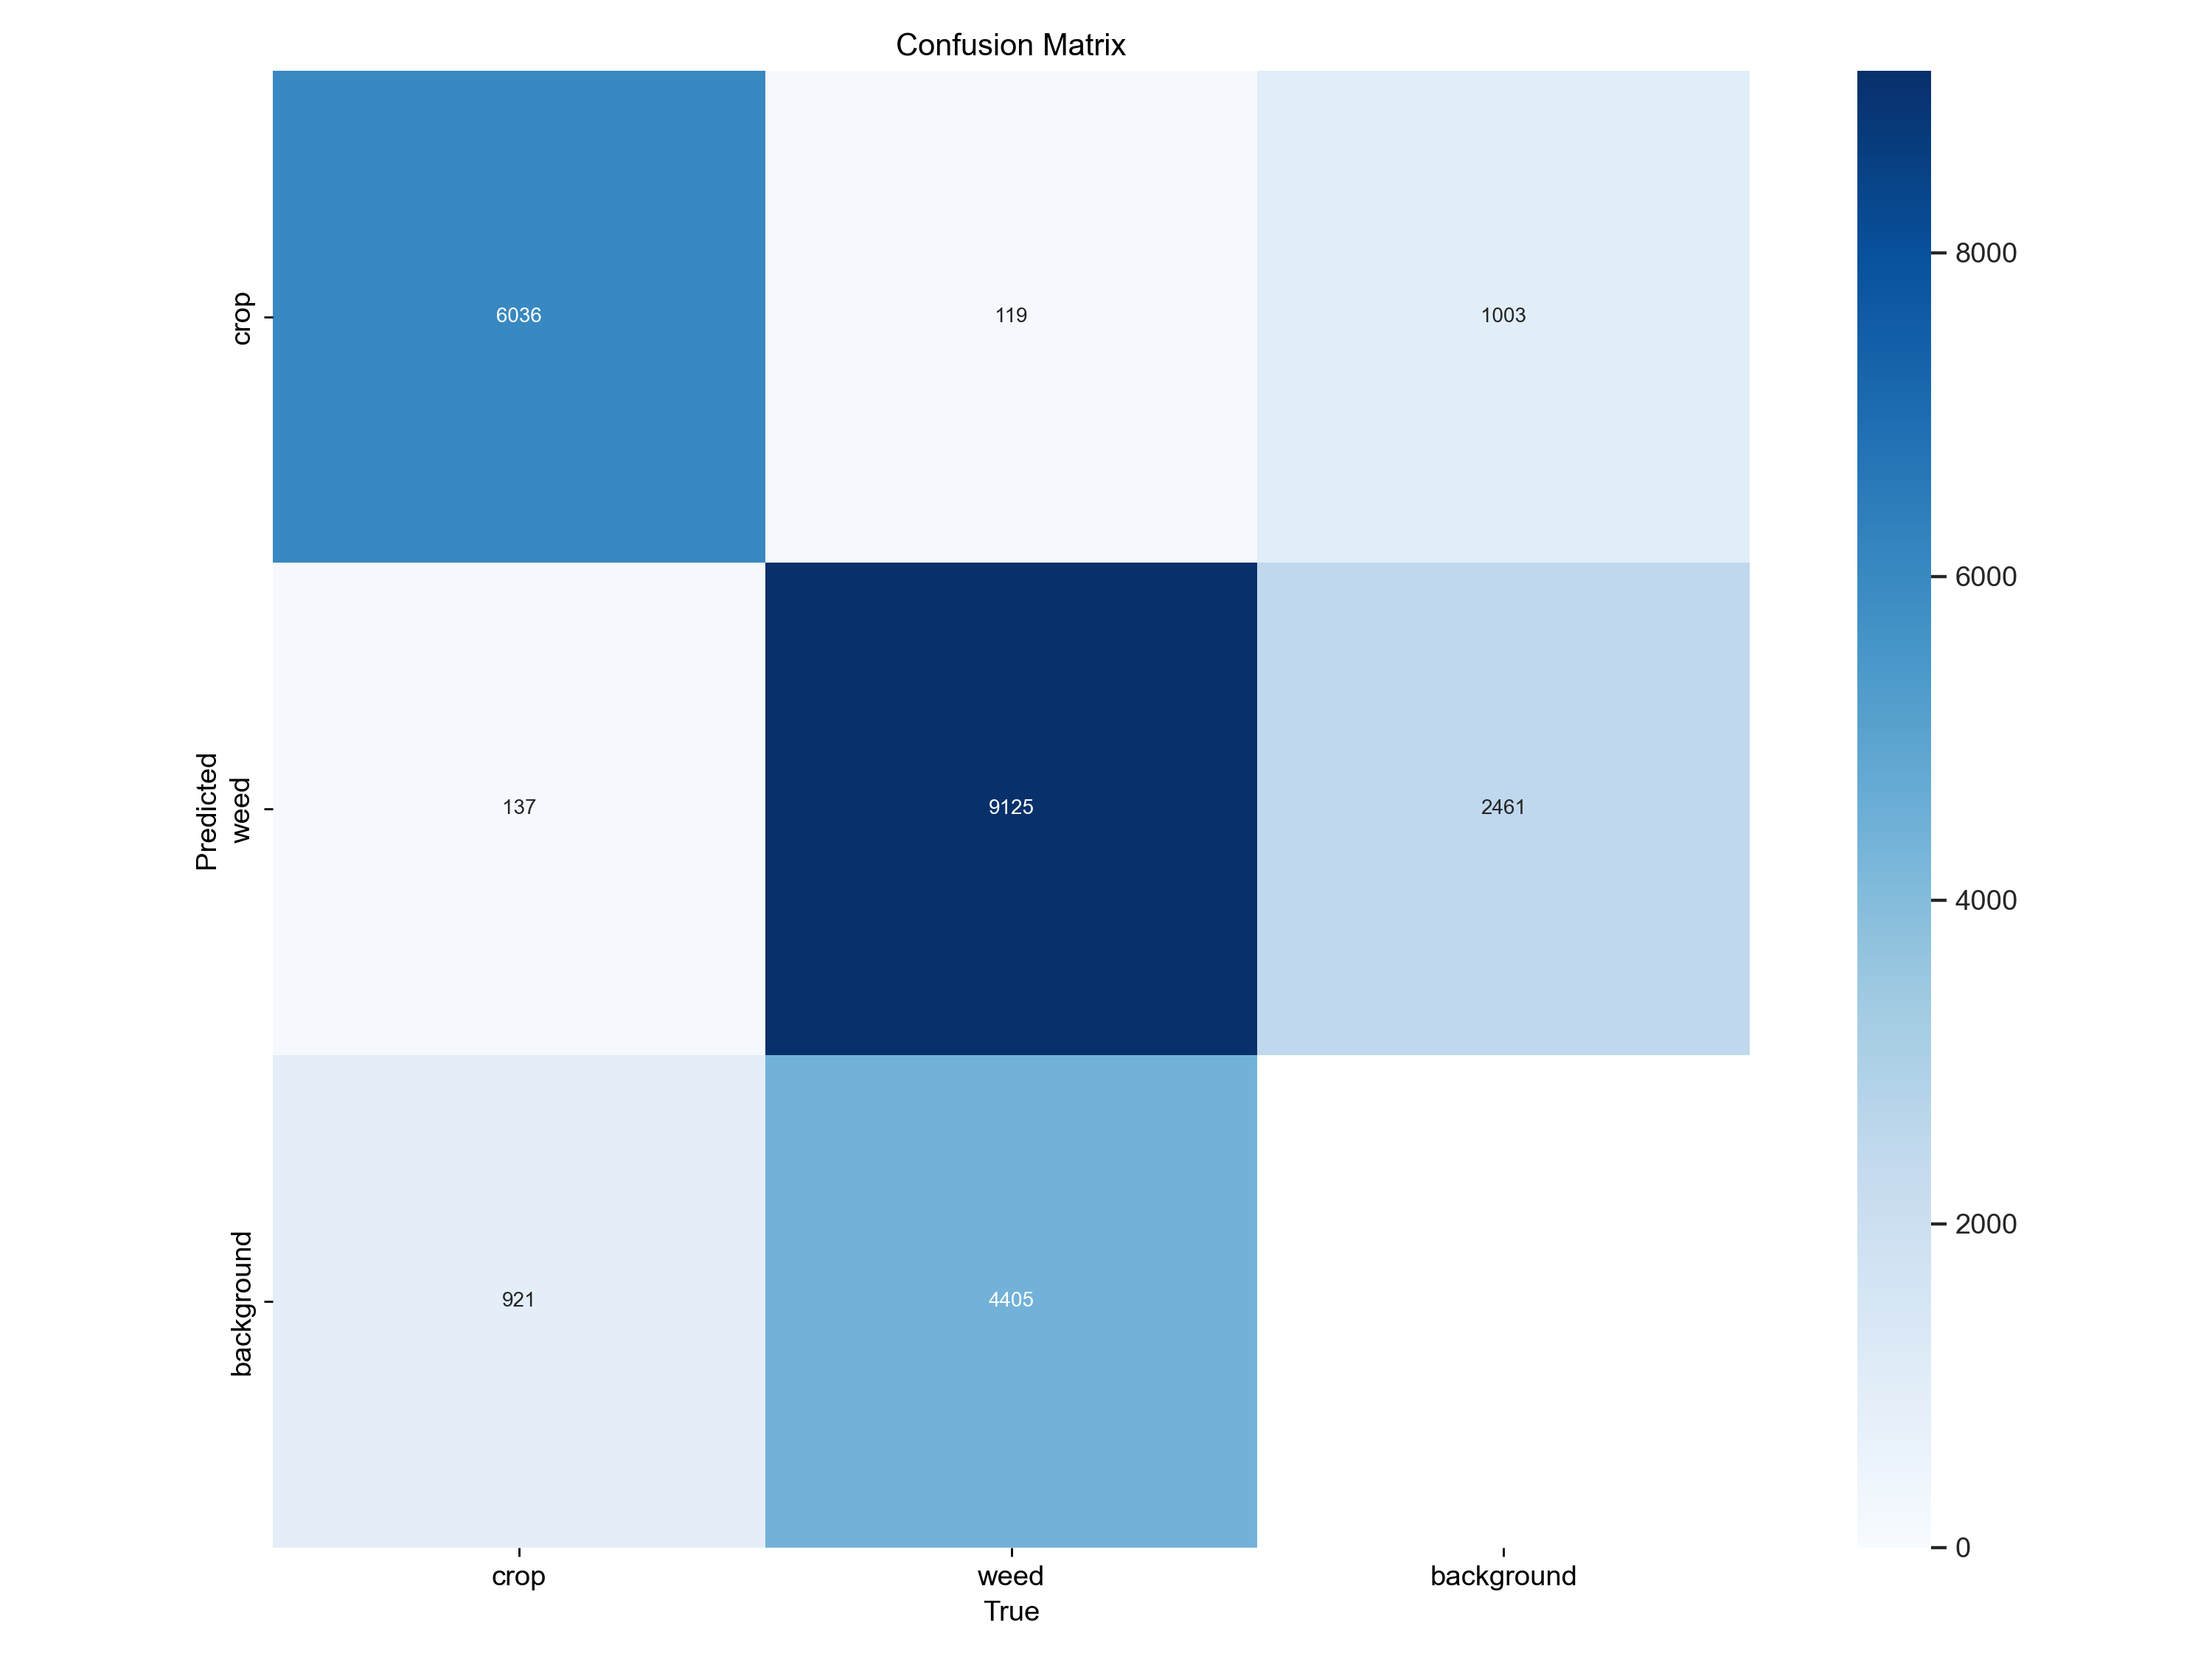

In [19]:
from IPython.display import Image as IPyImage

HOME = "D:/capstone/YOLO11_EfficientNet/"
filename = f"{HOME}runs/detect/yolo11_EfficientNet8/confusion_matrix.png"
IPyImage(filename=filename, width=800)

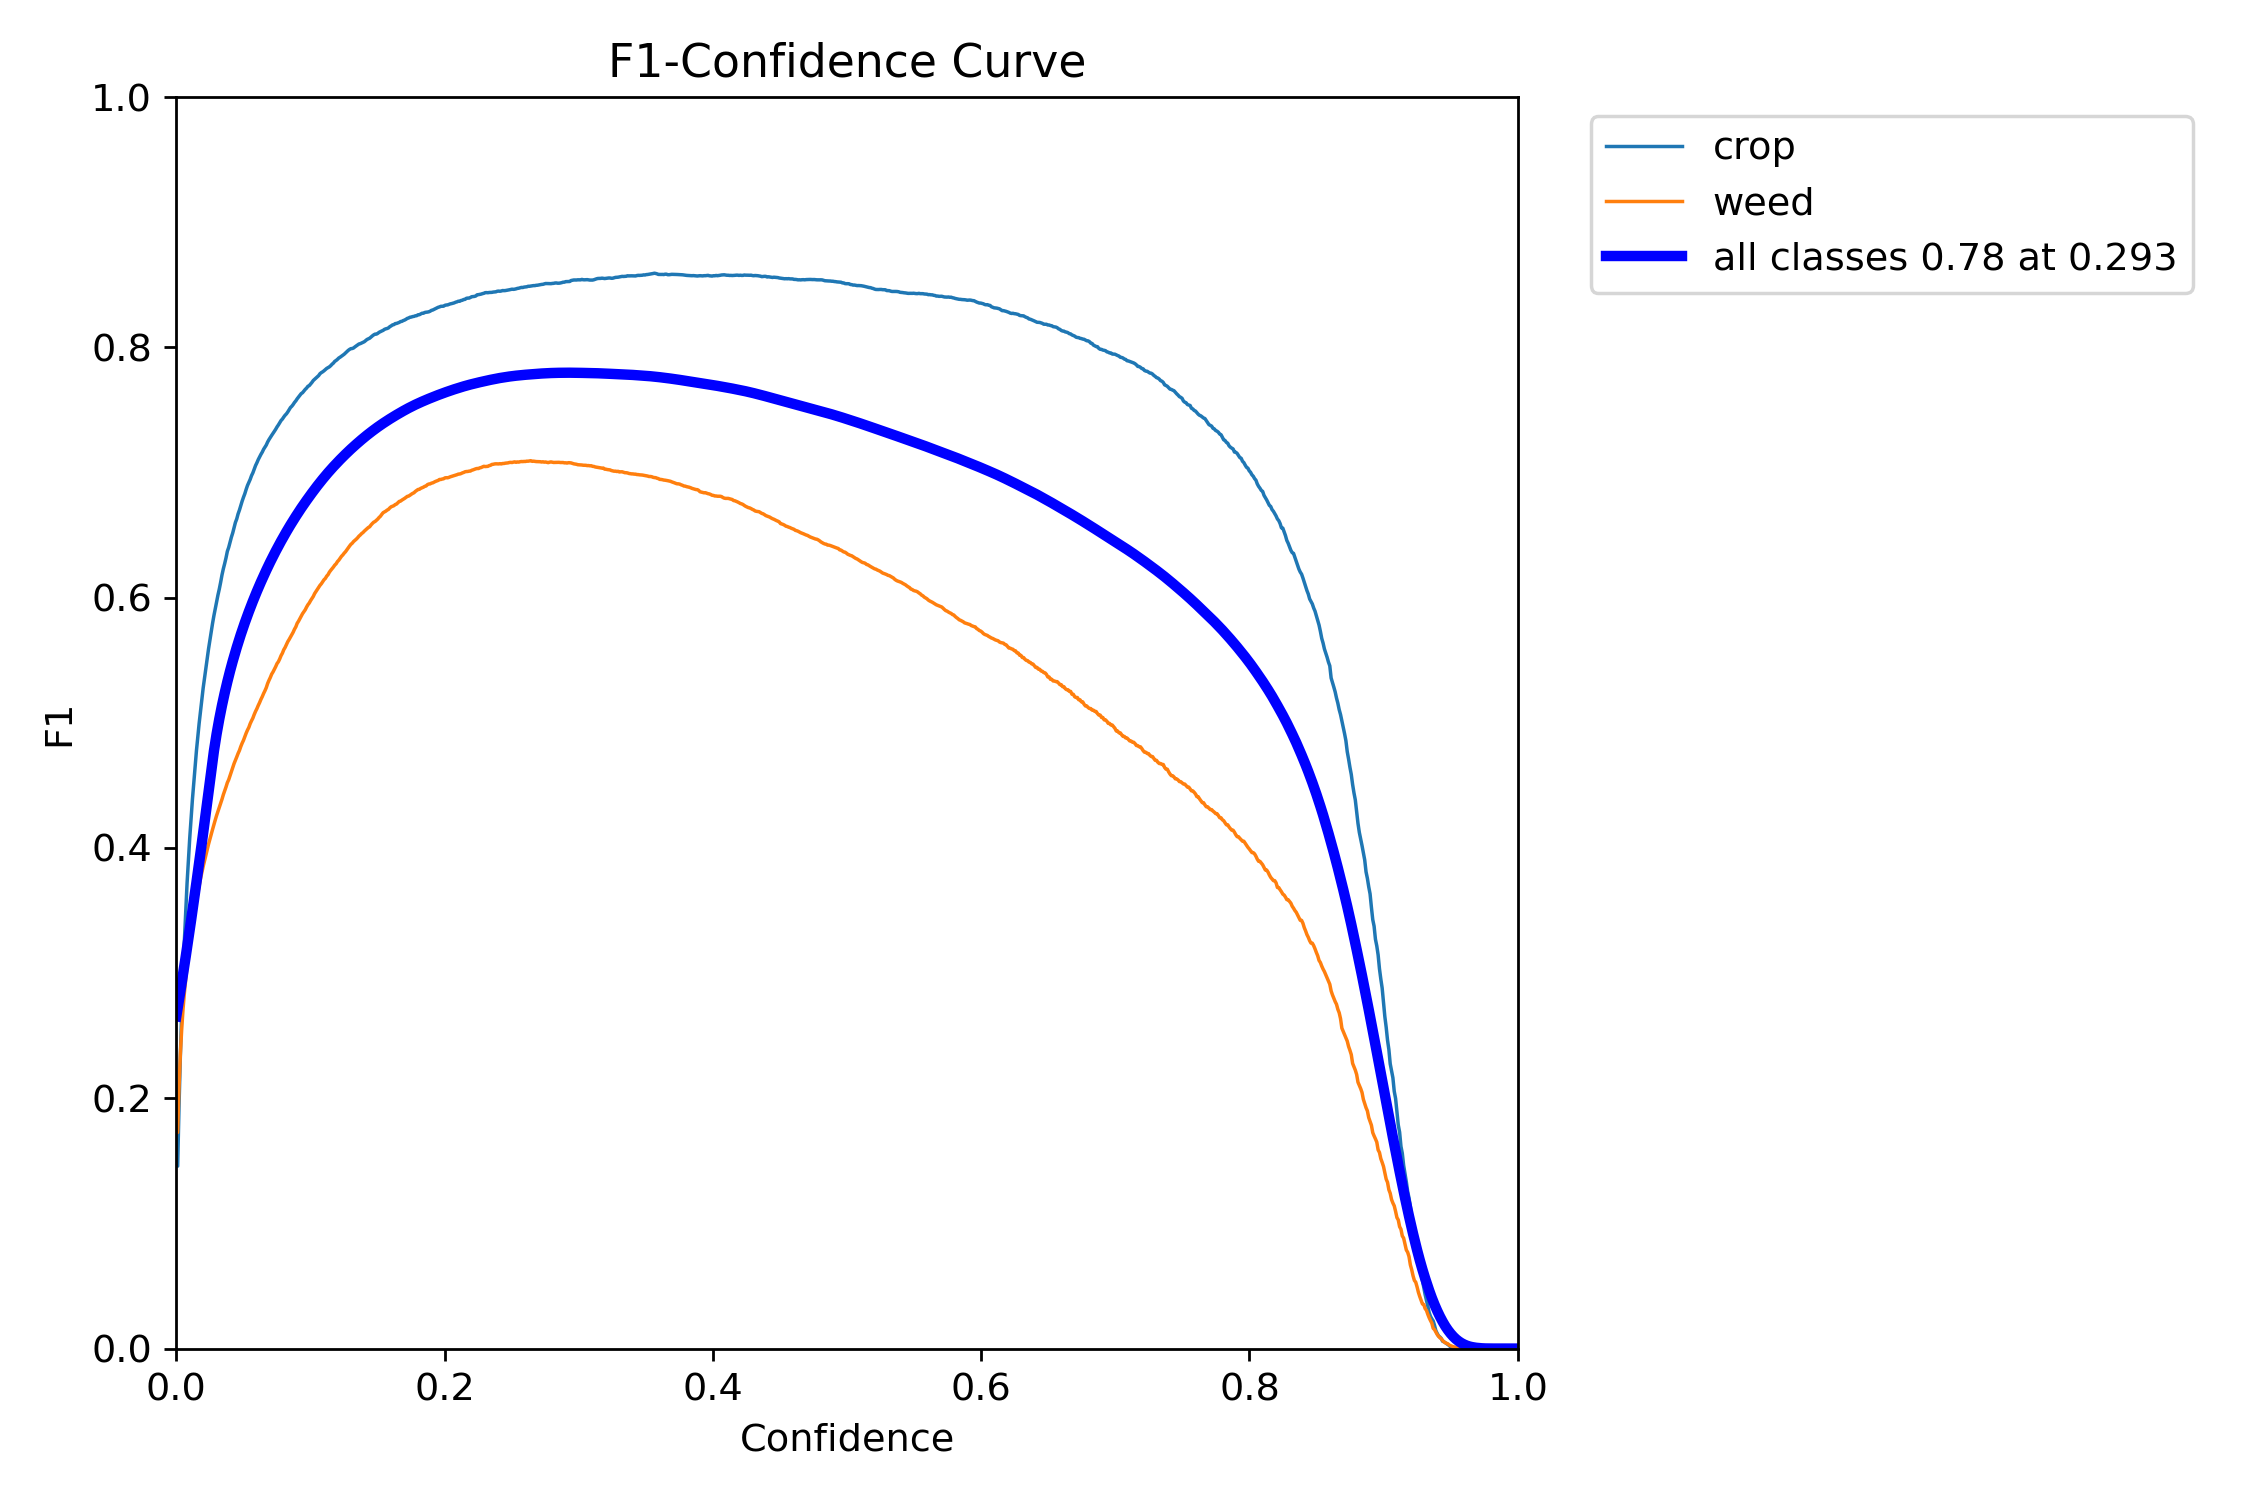

In [20]:
filename = f"{HOME}runs/detect/yolo11_EfficientNet8/F1_curve.png"
IPyImage(filename=filename, width=800)

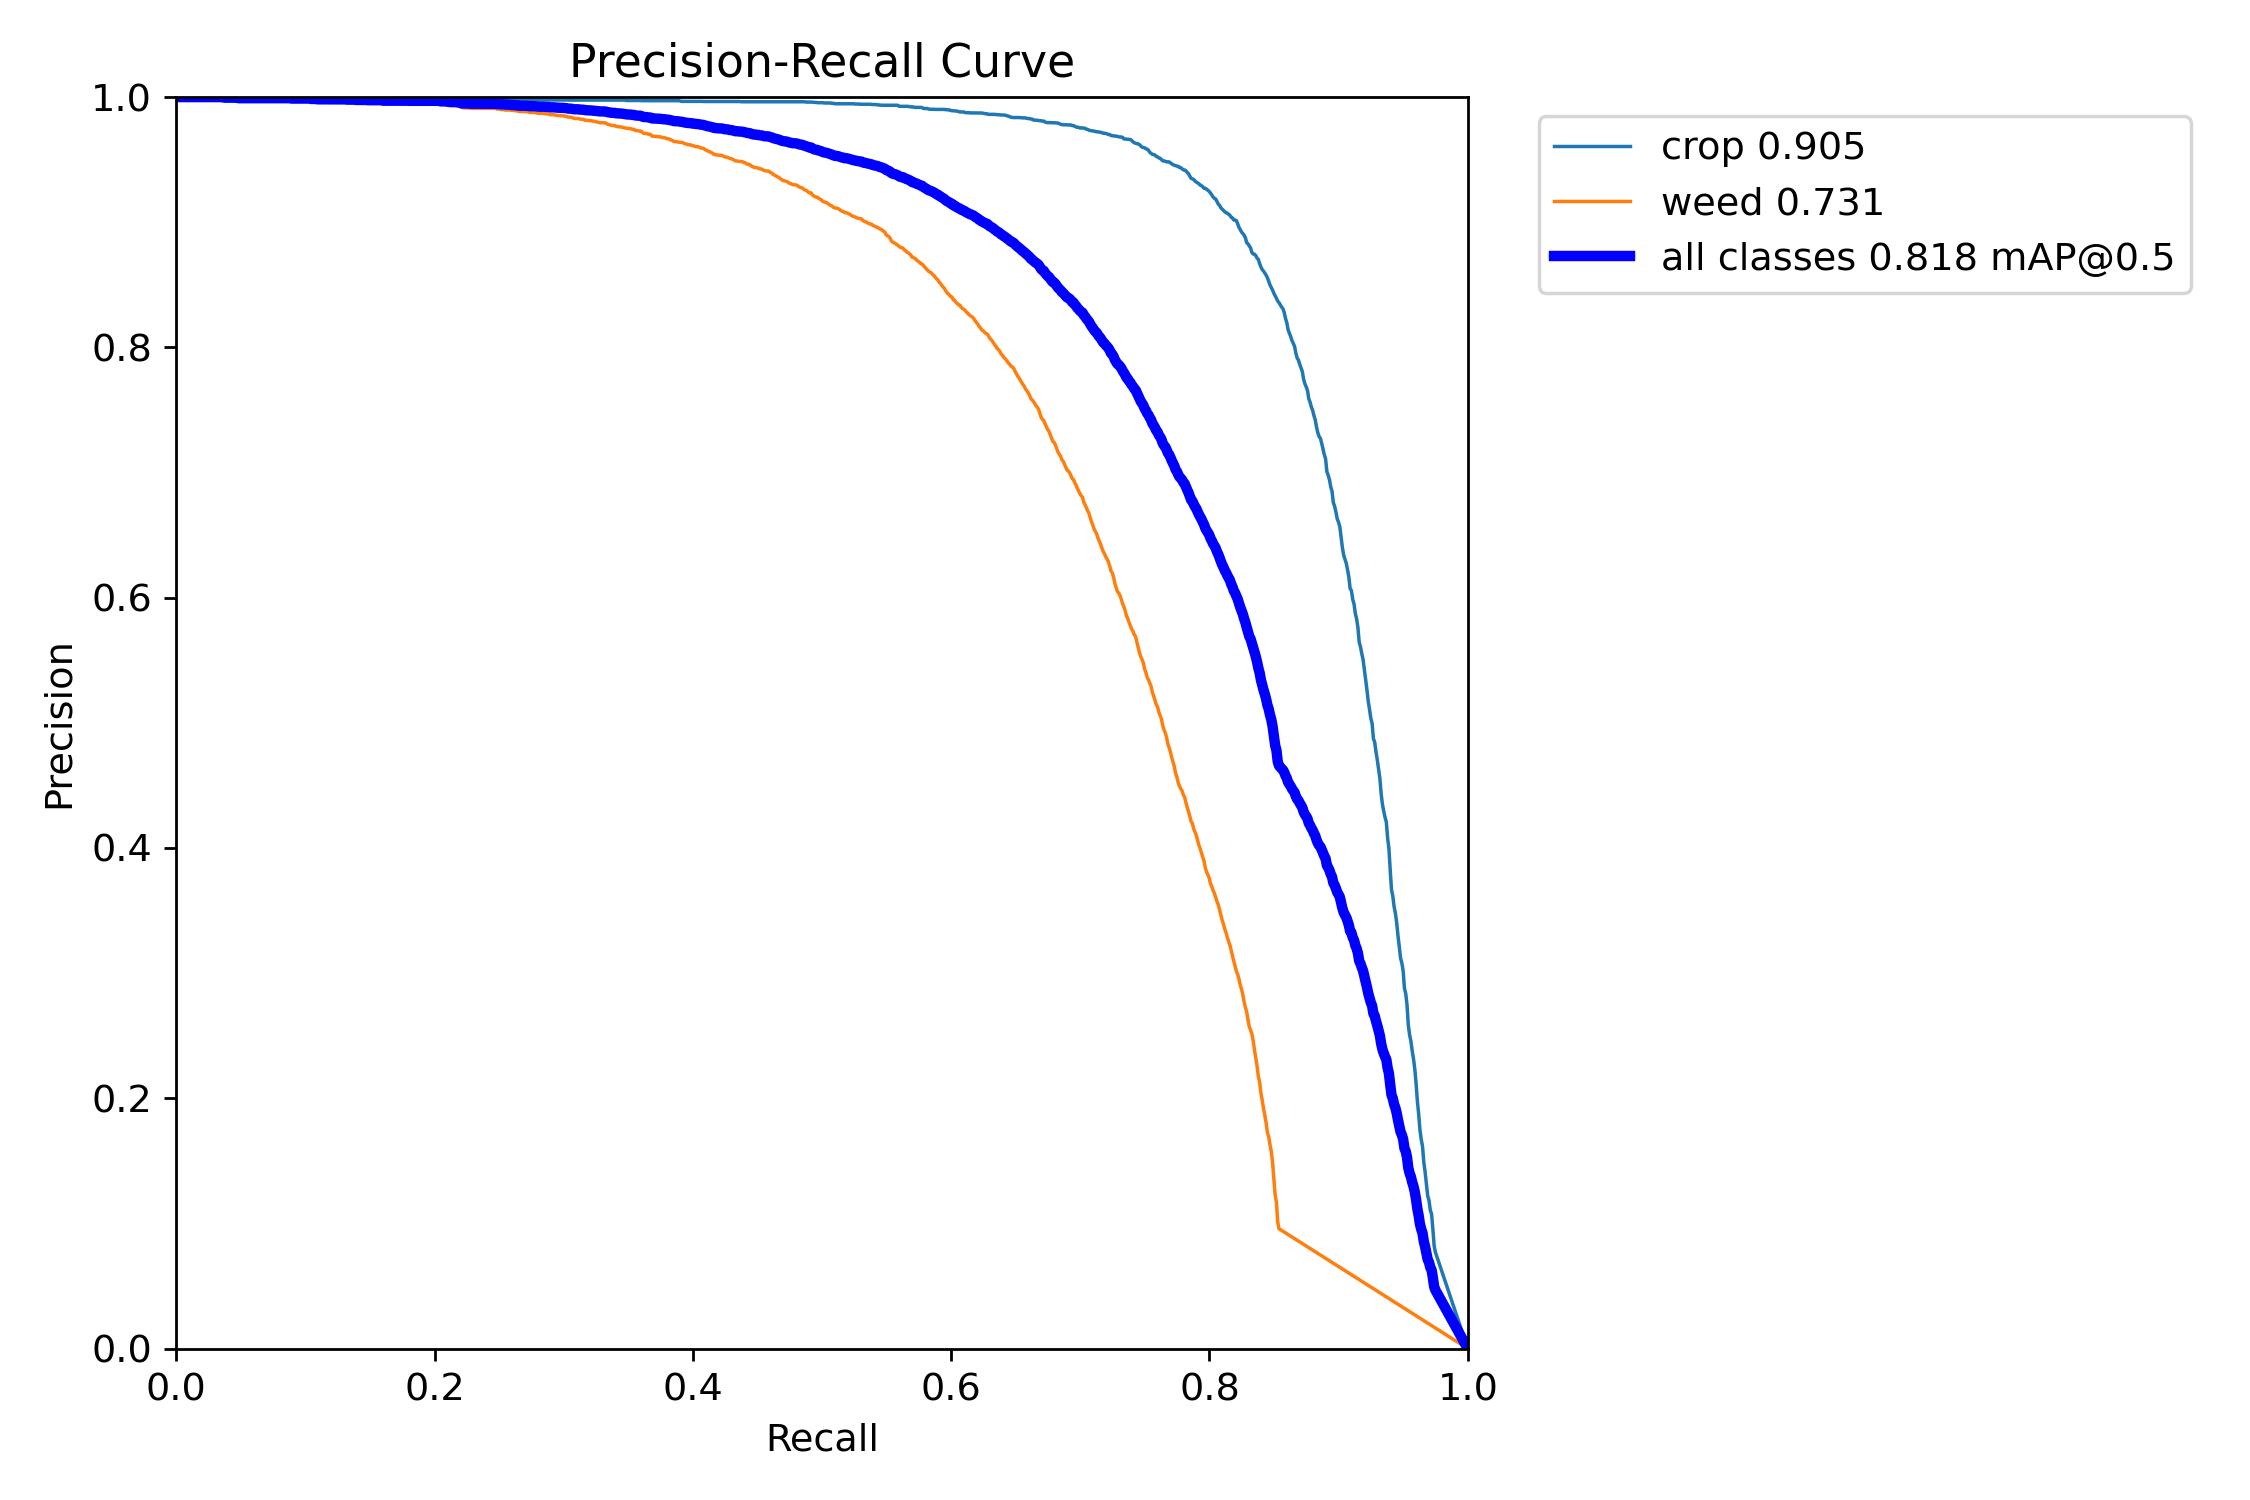

In [21]:
filename = f"{HOME}runs/detect/yolo11_EfficientNet8/PR_curve.png"
IPyImage(filename=filename, width=800)

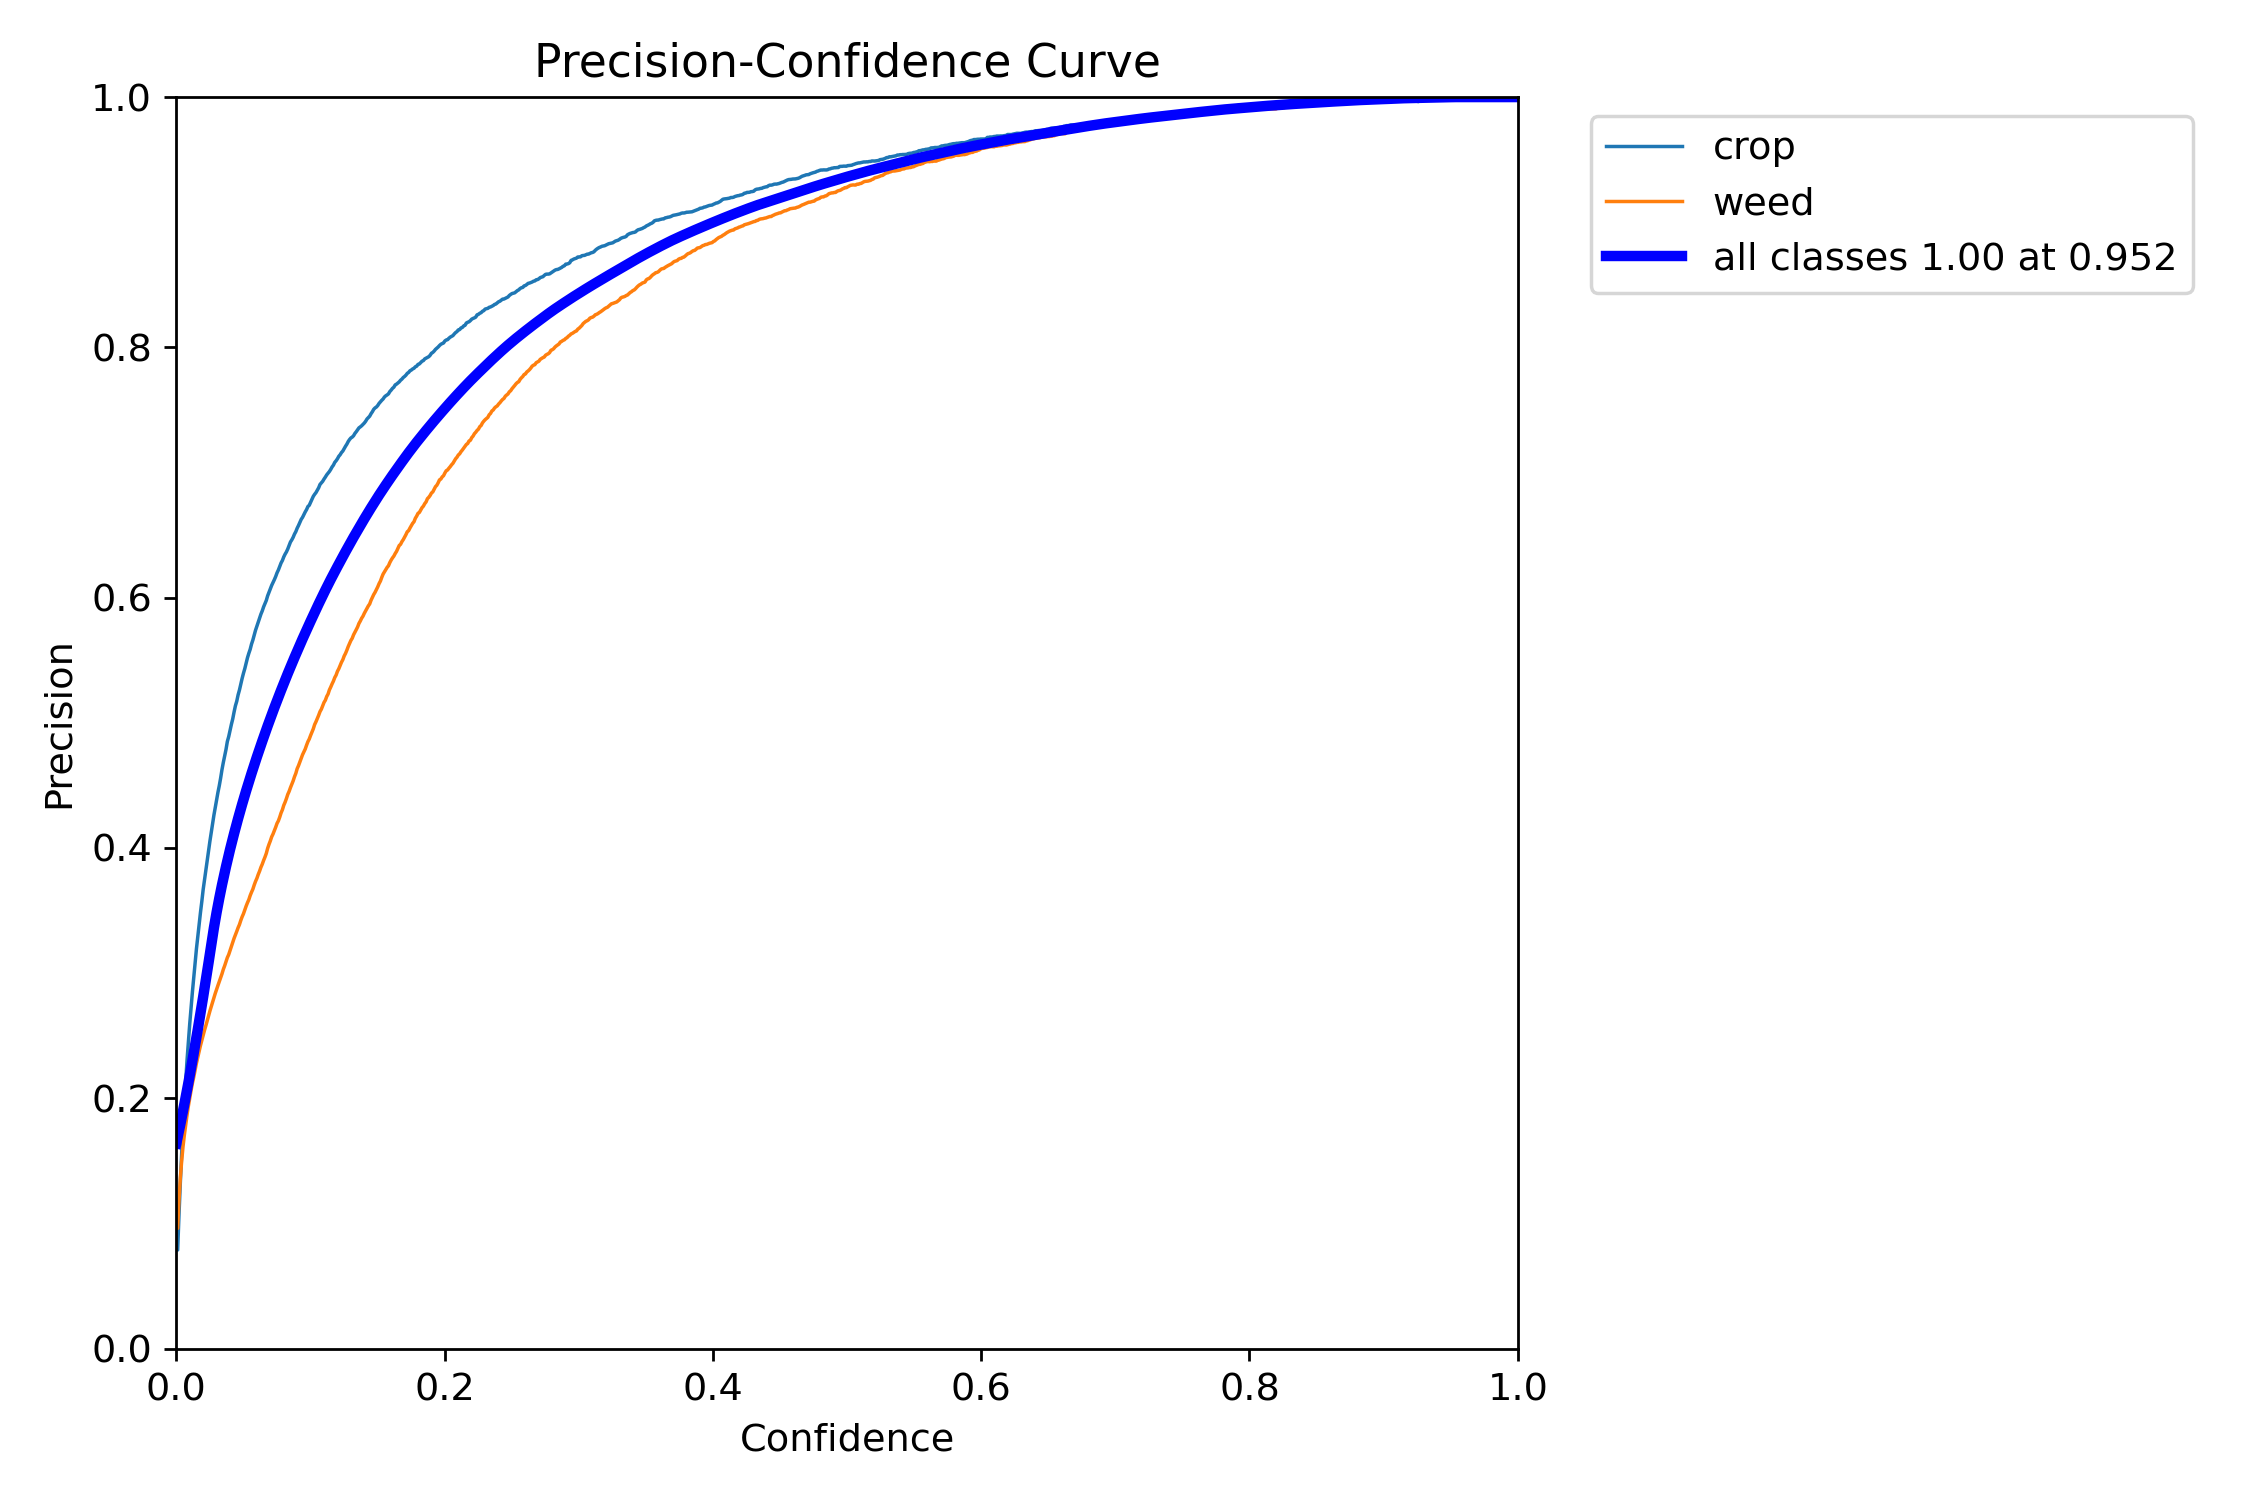

In [22]:
filename = f"{HOME}runs/detect/yolo11_EfficientNet8/P_curve.png"
IPyImage(filename=filename, width=800)

#  VALIDATION

In [24]:
from pathlib import Path

# Load the trained model
model_path = r"D:\capstone\YOLO11_EfficientNet\runs\detect\yolo11_EfficientNet8\weights\best.pt"
model = YOLO(model_path)

# Define the validation dataset path
data_yaml = r"D:\capstone\YOLO11_EfficientNet\crops,weeds-2\data.yaml"

# Run validation
val_results = model.val(
    data=data_yaml,  # Path to dataset YAML file
    imgsz=640,  # Image size
    batch=16,   # Batch size
    conf=0.25,  # Confidence threshold
    iou=0.5,    # IoU threshold for NMS
    save_json=True,  # Save results in COCO format
    save_txt=True,   # Save results in text format
    name="val_yolo11_EfficientNet8"  # Static name instead of Path(model.cfg).stem
)


Ultralytics 8.3.27  Python-3.11.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11_EfficientNet summary: 266 layers, 1,388,130 parameters, 0 gradients, 3.9 GFLOPs


val: Scanning D:\capstone\YOLO11_EfficientNet\crops,weeds-2\valid\labels.cache... 939 images, 0 backgrounds, 0 corrupt: 100%|██████████| 939/939 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:22<00:00,  2.62it/s]


                   all        939      20743      0.858      0.747      0.835      0.639
                  crop        937       7094        0.9      0.844      0.904      0.729
                  weed        939      13649      0.816      0.651      0.766      0.549
Speed: 0.5ms preprocess, 3.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Saving runs\detect\val_yolo11_EfficientNet82\predictions.json...
Results saved to runs\detect\val_yolo11_EfficientNet82


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Extract key metrics
metrics = {
    "mAP@50": val_results.box.map50.item(),
    "mAP@50-95": val_results.box.map.item(),
    "Precision": val_results.box.p.mean().item(),  # Get mean Precision
}

# Print results
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


mAP@50: 0.8350
mAP@50-95: 0.6387
Precision: 0.8578
Recall: 0.7474


In [ ]:
# Inference on test images
def predict_images(source_folder):
    results = model.predict(
        source=source_folder,
        conf=0.25,
        save=True
    )
    return results

# Example usage
test_folder = "D:\\capstone\\datasets\\crops,weeds-2\\test\\images"
predict_images(test_folder)

#results = model("path/to/image.jpg")
#results[0].show()

NameError: name 'model' is not defined

Found folders: ['D:\\capstone\\YOLO11_EfficientNet\\runs\\detect\\predict\\']
Latest folder: D:\capstone\YOLO11_EfficientNet\runs\detect\predict\


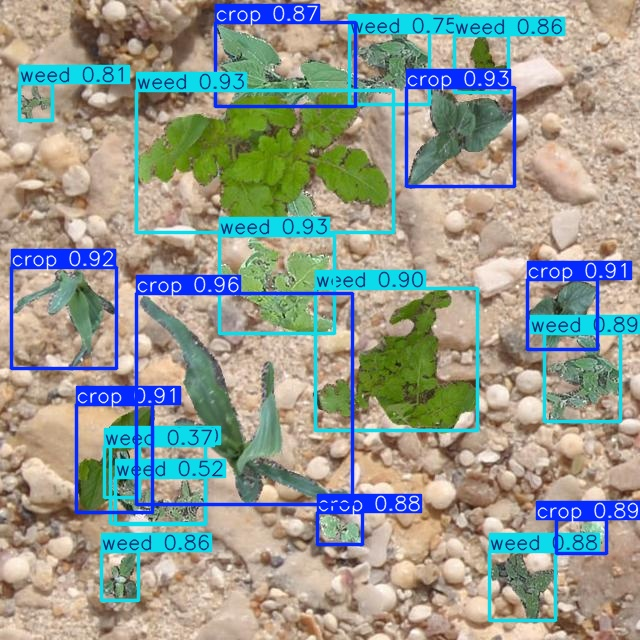

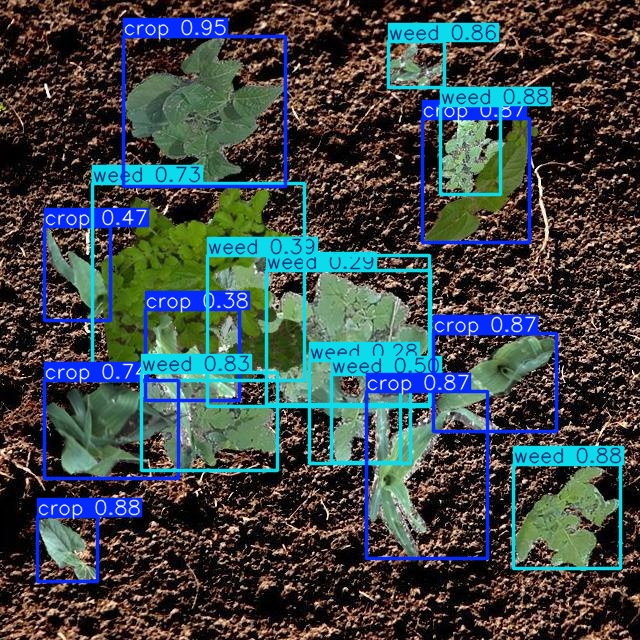

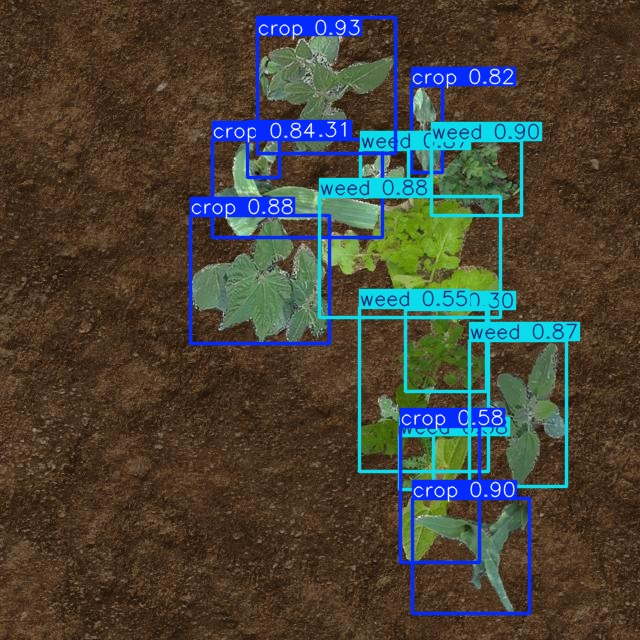

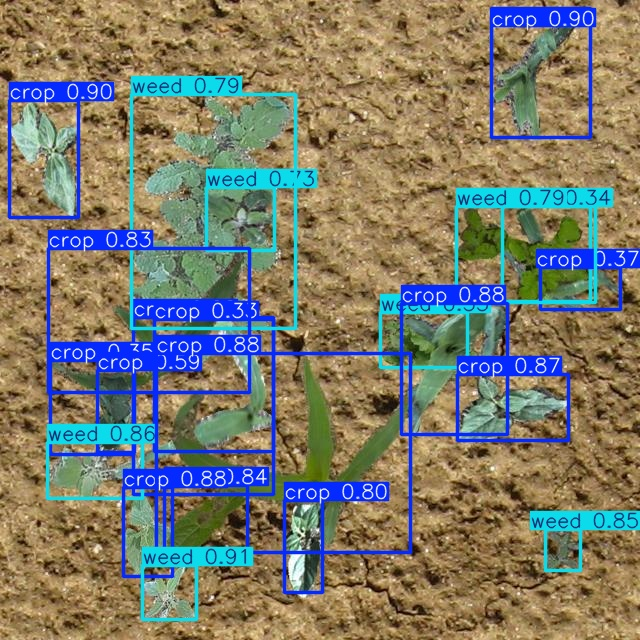

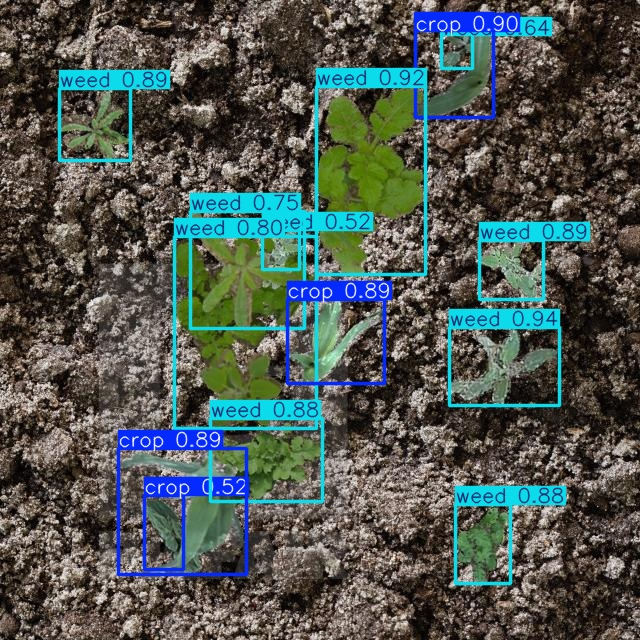

In [43]:
import glob
import os
from IPython.display import Image as IPyImage, display

folders = glob.glob(r'D:\capstone\YOLO11_EfficientNet\runs\detect\predict*/')
print("Found folders:", folders)

if folders:
    # Get the latest folder by modification time
    latest_folder = max(folders, key=os.path.getmtime)
    print("Latest folder:", latest_folder)
    
    # Display the first 3 images in that folder
    for img in glob.glob(f'{latest_folder}/*.jpg')[:5]:
        display(IPyImage(filename=img, width=600))
        print("\n")
else:
    print("No folders found matching the pattern.")

Train Metrics:
Precision: 84.63%
Recall: 73.14%
F1-Score: 78.47%
mAP50: 81.97%

Validation Metrics:
Precision: 85.78%
Recall: 74.74%
F1-Score: 80.0%
mAP50: 83.5%


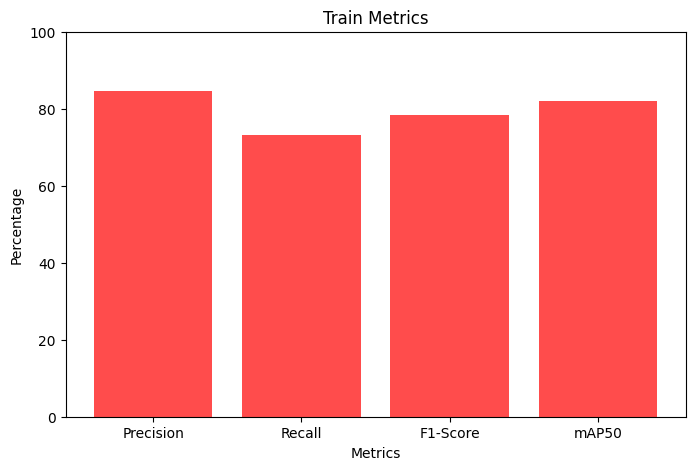

<Figure size 640x480 with 0 Axes>

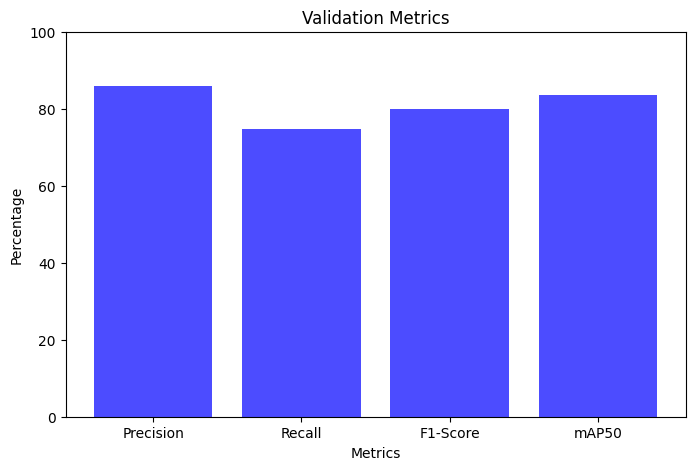

<Figure size 640x480 with 0 Axes>

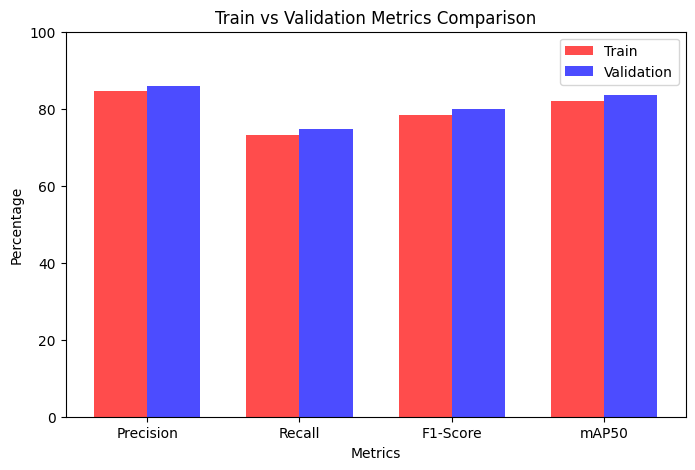

<Figure size 640x480 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure inline plotting for Jupyter Notebook
%matplotlib inline

# Best epoch metrics
train_metrics = {
    'Precision': 84.63,
    'Recall': 73.14,
    'F1-Score': 78.47,
    'mAP50': 81.97
}

validation_metrics = {
    'Precision': 85.78,
    'Recall': 74.74,
    'F1-Score': 80.00,
    'mAP50': 83.50
}

# Print train and validation metrics
print("Train Metrics:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value}%")

print("\nValidation Metrics:")
for metric, value in validation_metrics.items():
    print(f"{metric}: {value}%")

# Bar chart for train metrics
plt.figure(figsize=(8, 5))
plt.bar(train_metrics.keys(), train_metrics.values(), color='red', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Train Metrics')
plt.ylim(0, 100)
plt.show(block=True)
plt.savefig("train_metrics.png")

# Bar chart for validation metrics
plt.figure(figsize=(8, 5))
plt.bar(validation_metrics.keys(), validation_metrics.values(), color='blue', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Validation Metrics')
plt.ylim(0, 100)
plt.show(block=True)
plt.savefig("validation_metrics.png")

# Comparison graph for train and validation
metrics = list(validation_metrics.keys())
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, train_metrics.values(), width, label='Train', color='red', alpha=0.7)
rects2 = ax.bar(x + width/2, validation_metrics.values(), width, label='Validation', color='blue', alpha=0.7)

ax.set_xlabel('Metrics')
ax.set_ylabel('Percentage')
ax.set_title('Train vs Validation Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.ylim(0, 100)
plt.show(block=True)
plt.savefig("train_vs_validation_comparison.png")

In [5]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

models = ['Nano', 'Small', 'Medium', 'Large', 'YOLOv11 + EfficientNet']
metrics = {
    'Precision': [87.7, 88.6, 88.6, 89.3, 85.8],
    'Recall': [77.6, 80.5, 82.4, 83.1, 74.7],
    'mAP@50': [85.8, 88.0, 89.2, 89.8, 83.5],
    'F1-score': [82.4, 84.3, 85.4, 86.1, 79.9]
}

# Convert to DataFrame
df = pd.DataFrame(metrics, index=models)

# Grouped Bar Chart for All Metrics
fig = go.Figure()

for metric in metrics.keys():
    fig.add_trace(go.Bar(
        name=metric,
        x=models,
        y=metrics[metric],
        text=metrics[metric],
        textposition='auto'
    ))

# Update Layout
fig.update_layout(
    title='YOLOv11: Detection Performance Across Models',
    xaxis_title='Model Size',
    yaxis_title='Score (%)',
    barmode='group',
    bargap=0.2,
    bargroupgap=0.1
)

fig.show()

# Line Chart for Better Trend Visualization
fig_line = px.line(
    df,
    title='YOLOv11: Performance Trends Across Models',
    markers=True
)
fig_line.update_layout(
    xaxis_title='Model Size',
    yaxis_title='Score (%)'
)
fig_line.show()
